In [1]:
#importing necessary libaries
import cv2
import matplotlib.pyplot as plt
import numpy as np

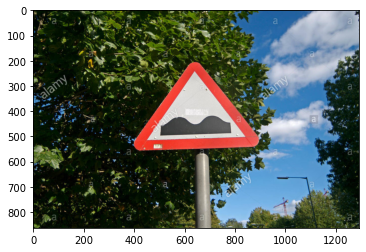

In [2]:
img="D:/Engineering/New folder/GTSRB/External/road_bump.jpg"
img=cv2.imread(img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
#resizing the image
if img.shape[0]>img.shape[1]:
    img=cv2.resize(img,(300,350))
else:
    img=cv2.resize(img,(350,300))
img1=img

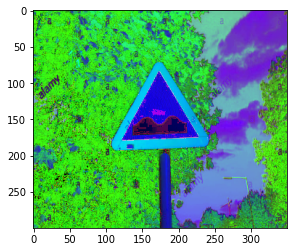

In [4]:
#HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

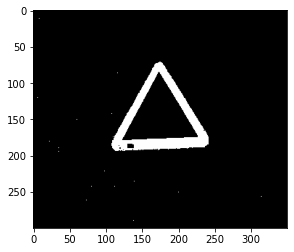

In [5]:
#masking the red regions
mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))

#Merge the mask
mask = cv2.bitwise_or(mask1, mask2)

# Display the masked image
plt.imshow(mask,cmap='gray')

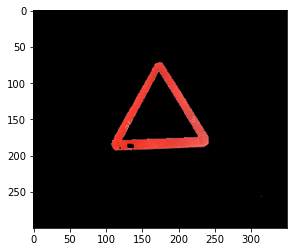

In [6]:
#cropping the mask and displaying the image
croped = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(croped)

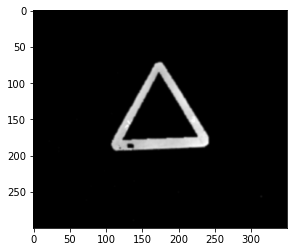

In [7]:
img=croped
imgContour=img.copy()
   
imgBlur=cv2.GaussianBlur(img,(7,7),1) #blurring the image
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_RGB2GRAY) #converting the image to grayscale

plt.imshow(imgGray,cmap="gray")

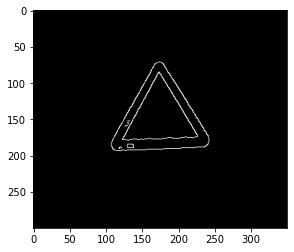

In [8]:
#detecting the edges
imgCanny=cv2.Canny(imgGray,80,80)
kernel=np.ones((5,5))
plt.imshow(imgCanny,cmap='gray')

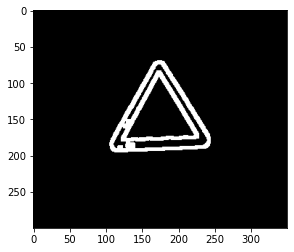

In [9]:
#Dilation is performed to accentuate the features
imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
plt.imshow(imgDil,cmap='gray')

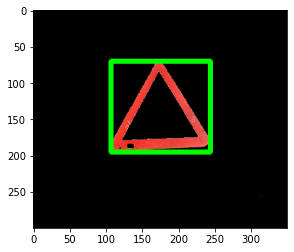

In [10]:
def getContours(img,imgContour):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    img_pixel=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>900:
            peri = cv2.arcLength(cnt,True)
            approx= cv2.approxPolyDP(cnt,0.02*peri,True)
            x,y,w,h=cv2.boundingRect(approx)
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),5) #drawing bounding box
            new_img=img1[y:y+h,x:x+w] #cropping the ROI
            img_pixel.append(new_img)
    return np.array(img_pixel)
    
img_pixel=getContours(imgDil,imgContour)
plt.imshow(imgContour)

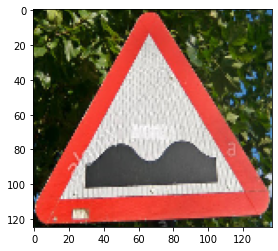

In [11]:
if len(img_pixel)>=1:
    plt.imshow(img_pixel[0]) 

In [12]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
from tensorflow.keras.models import load_model

new_model=load_model('D:/Engineering/New folder/GTSRB/Models/model_normal.h5') #loading the trained model

In [14]:
#resizing the image
resized_img=[]
for i in range(len(img_pixel)):
    temp=cv2.resize(img_pixel[i],(32,32))
    resized_img.append(temp)
resized_img=np.array(resized_img)

In [15]:
resized_img.shape

(1, 32, 32, 3)

In [16]:
#predictions
if len(resized_img)==0:
    print("No traffic signs found")
else:
    pred=np.argmax(new_model.predict(resized_img), axis=-1)
    for i in pred:
        print(classes[i])
    print(pred)

Bumpy road
[22]
